<a href="https://colab.research.google.com/github/Ttm2025/test/blob/main/KAz7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def add(x, y): return ['+', x, y]
def sub(x, y): return ['-', x, y]
def mul(x, y): return ['*', x, y]
def div(x, y): return ['/', x, y]
def power(x, y): return ['^', x, y]
def negative(x): return ['~', x]
def sin_(x): return ['sin', x]
def cos_(x): return ['cos', x]
def sqrt_(x): return ['sqrt', x]
def ln_(x): return ['ln', x]
def exp_(x): return ['exp', x]

def Sum(*x): return ['S', *x] if len(x) > 1 else x[0]
def Product(*x): return ['P', *x] if len(x) > 1 else x[0]

In [ ]:
Sum(1, 2, 3)

['S', 1, 2, 3]

In [ ]:
f = mul(2, add(3, div('x', cos_('x'))))
print(f)

['*', 2, ['+', 3, ['/', 'x', ['cos', 'x']]]]


In [ ]:
def fix(x):
  if isinstance(x, Expression):
    return x
  return Expression(x)

class Expression:
  def __init__(self, x):
    self.T = x
  def __add__(self, x):
    return Expression(add(self.T, fix(x).T))
  def __radd__(self, x):
    return Expression(add(fix(x).T, self.T))
  def __sub__(self, x):
    return Expression(sub(self.T, fix(x).T))
  def __rsub__(self, x):
    return Expression(sub(fix(x).T, self.T))
  def __mul__(self, x):
    return Expression(mul(self.T, fix(x).T))
  def __rmul__(self, x):
    return Expression(mul(fix(x).T, self.T))
  def __truediv__(self, x):
    return Expression(div(self.T, fix(x).T))
  def __rtruediv__(self, x):
    return Expression(div(fix(x).T, self.T))
  def __pow__(self, x):
    return Expression(power(self.T, fix(x).T))
  def __rpow__(self, x):
    return Expression(power(fix(x).T, self.T))
  def __neg__(self):
    return Expression(negative(self.T))  
  def __getitem__(self, k):
    return Expression(self.T[k + 1])
  def __len__(self):
    if isinstance(self.T, list):
      return len(self.T) - 1
    return 0 
  
def sin(x):
  return Expression(sin_(fix(x).T))
def cos(x):
  return Expression(cos_(fix(x).T))
def sqrt(x):
  return Expression(power(x.T, fix(Q(1,2)).T))
def ln(x):
  return Expression(ln_(fix(x).T))
def exp(x):
  return Expression(exp_(fix(x).T))

In [ ]:
x = Expression('x')
f = 2 * x + 1

In [ ]:
f.T

['+', ['*', 2, 'x'], 1]

In [ ]:
def show(x):
  display(Math(latex(x)))

def enclose(x):
  return f'\\left( {x} \\right)'

def latex(x):
  if isinstance(x, Expression):
    return latex(x.T)

  if isinstance(x, int):
    return str(x)

  if isinstance(x, str):
    return extendSymbol(x)

  op = x[0]
  if op in '+-*/^':
    l, r = latex(x[1]), latex(x[2])
    if op == '+':
      return f'{l} + {r}'
    if op == '-':
      return f'{l} - {r}'
    if op == '*':
      if isinstance(x[1], list) and x[1][0] in '+-' or l[0] == '-':
        l = enclose(l)
      if isinstance(x[2], list) and x[2][0] in '+-' or r[0] == '-':
        r = enclose(r)      
      return f'{l} \\cdot {r}'
    if op == '/':
      return f'\\dfrac{{{l}}}{{{r}}}'
    if op == '^':
      if isinstance(x[1], list):
        l = enclose(l)
      return f'{{{l}}}^{{{r}}}'
  elif op == 'S':
    A = [latex(a) for a in x[1:]]
    for k in range(len(A)):
      if A[k][0] == '-':
        A[k] = enclose(A[k])
      return ' + '.join(A)
  elif op == 'P':
    A = [latex(a) for a in x[1:]]
    for k in range(1, len(x)):
      if isinstance(x[k], list) and x[k][0] == 'S' or A[k-1][0] == '-':
        A[k-1] = enclose(A[k-1])
    return ' \\cdot '.join(A)
  elif op == 'q':
    if x[2] == 1:
      return str(x[1])
    if x[1] > 0:
      return f'\\frac{{{x[1]}}}{{{x[2]}}}'
    return f'-\\frac{{{-x[1]}}}{{{x[2]}}}'
  elif op == '=':
    return f'{latex(x[1])} = {latex(x[2])}'
  elif op == 'set':
    A = [latex(a) for a in x[1:]]
    return f'\\left\\{{ {",".join(A)} \\right\\}}'
  elif op == 'integral':
    return f'\\int{{{latex(x[1])}}}d{{{latex(x[2])}}}'
  else: 
    a = enclose(latex(x[1]))
    if op == '~':
      return f'- {a}'
    if op == 'sin':
      return f'\\sin {a}'
    if op == 'cos':
      return f'\\cos {a}'
    if op == 'sqrt':
      return f'\\sqrt{{{a}}}'
    if op == 'ln':
      return f'\\ln {a}'
    if op == 'exp':
      return f'e ^ {{{a}}}'

def extendSymbol(x):
  if len(x) == 1:
    return x
  if x in ['alpha', 'beta', 'gamma', 'pi']:
    return f'\\{x}'
  return f'{x[0]}_{{{x[1:]}}}'

In [ ]:
f = Expression(Sum(1, x.T, 2))
show(f)
g = Expression(Product(x.T, -2, Sum(x.T, 1)))
show(g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
show(f)

<IPython.core.display.Math object>

In [ ]:
show(3 ** f)

<IPython.core.display.Math object>

In [ ]:
show(sin(f))

<IPython.core.display.Math object>

In [ ]:
show((1 + x) ** 2)

<IPython.core.display.Math object>

In [ ]:
show(1 + (-x))
show(1 - (x - 2))
show((x + 1) * (2 - x))
show(sin(2 + x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def symbols(s):
  S = s.split()
  if len(S) == 1:
    return Expression(s)
  return (Expression(i) for i in S)


In [ ]:
x, y, z = symbols('x y z')
show(x + y + z)

<IPython.core.display.Math object>

In [ ]:
from functools import reduce

In [ ]:
def evalf(x, arg = {}):
  if isinstance(x, Expression):
    if isinstance(arg, dict):
      arg = {i.T: arg[i] for i in arg}
    else:
      arg = {'$': arg}
    return evalf(x.T, arg)

  if isinstance(x, int):
    return x

  if isinstance(x, str):
    if x in arg:
      return arg[x]
    return arg['$']

  op = x[0]
  if op in '+-*/^':
    l, r = evalf(x[1], arg), evalf(x[2], arg)
    if op == '+':
      return l + r
    if op == '-':
      return l - r
    if op == '*':
      return l * r
    if op == '/':
      return l / r
    if op == '^':
      return l ** r
  elif op in 'SP':
    A = [evalf(a, arg) for a in x[1:]]
    if op == 'S':
      return sum(A)
    if op == 'P':
      return reduce(lambda x, y: x * y, A, 1)
  elif op == 'q':
    return x[1] / x[2]
  else:
    a = evalf(x[1], arg)
    if op == '~':
      return - a
    if op == 'sin':
      return np.sin(a)
    if op == 'cos':
      return np.cos(a)
    if op == 'sqrt':
      return np.sqrt(a)
    if op == 'ln':
      return np.log(a)
    if op == 'exp':
      return np.exp(a)
  return None


In [ ]:
f = Expression(Sum(x.T, (x**2).T, (x**3).T))
show(f)
evalf(f, 2)

<IPython.core.display.Math object>

14

In [ ]:
evalf(exp(sin(1)))

2.319776824715853

In [ ]:
f1 = Expression(1) / 2 + 3
f2 = 2 * x
f3 = x + y
show(f1)
show(f2)
show(f3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
v1 = evalf(f1)
v2 = evalf(f2, 10)
v3 = evalf(f3, {x: 1, y: 100})
print(v1, v2, v3)

3.5 20 101


In [ ]:
def plot(y, x):
  X = np.linspace(x[1], x[2], 1000)
  if isinstance(y.T, int):
    Y = evalf(y) * np.ones(1000)
  else:
    Y = evalf(y, {x[0]: X})
  plt.plot(X, Y)

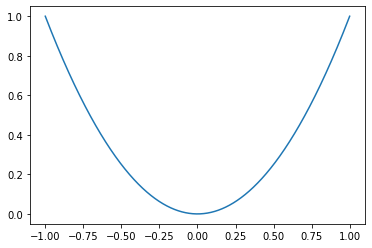

In [ ]:
plot(x ** 2, (x, -1, 1))

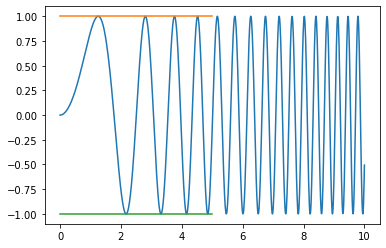

In [ ]:
plot(sin(z**2), (z, 0, 10))
plot(Expression(1), (x, 0, 5))
plot(Expression(-1), (x, 0, 5))

In [ ]:
def Z(x):
  return Expression(x)

def isInt(x):
  return isinstance(x.T, int)

def diff(y, x):
  if isInt(y):
    return Z(0)

  if isinstance(y.T, str):
    if y.T == x.T:
      return Z(1)
    return Z(0)

  op = y.T[0] 
  if op in '+-*/^':
    u, v = Expression(y.T[1]), Expression(y.T[2])
    du, dv = diff(u, x), diff(v, x)
    if op == '+':
      return du + dv
    if op == '-':
      return du - dv
    if op == '*':
      #if isInt(u): return u * dv # упрощение
      #if isInt(v): return du * v # упрощение
      return du * v + u * dv
    if op == '/':
      if isInt(u): return - u * dv / v ** 2 # упрощение
      if isInt(v): return du / v # упрощение
      return (du * v - u * dv) / v ** 2
    if op == '^':
      if isInt(v): # u(x) ^ n
        n = v.T
        if n == 0:
          return Z(0)
        if n == 1:
          return du
        if du.T == 1: return n * u ** (n - 1) # упрощение
        return n * u ** (n - 1) * du
      if isInt(u): # n ^ v(x)
        n = u.T
        return ln(n) * (u ** v) * dv
  else:
    u = Expression(y.T[1])
    du = diff(u, x)
    if op == '~': return -du
    if op == 'sin': return cos(u) * du
    if op == 'cos': return -sin(u) * du
    if op == 'sqrt': return du / (2 * sqrt(u))
    if op == 'ln': return du / u
    if op == 'exp': return exp(u) * du
  
  return None

In [ ]:
show(diff(sin(2 * x) / cos(x), x))

<IPython.core.display.Math object>

In [ ]:
def Diff(y, x, n = 1):
  dy = y
  for i in range(n):
    dy = diff(dy, x)
  return dy

In [ ]:
for n in range(5):
  show(Diff(x ** 3, x, n))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

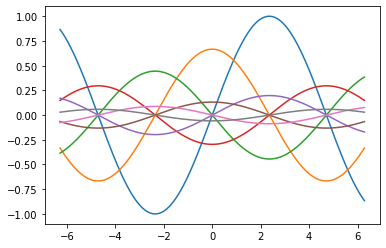

In [ ]:
f = sin(2 * x / 3)
for n in range(8):
  plot(Diff(f, x, n), (x, -2 * np.pi, 2 * np.pi))

In [ ]:
f = sin(2 * x / 3)
for n in range(4):
  show(Diff(f, x, n))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def taylorCoeffs(y, x, n, x0):
  A = [evalf(y, x0)]
  dy = diff(y, x)
  for i in range(n):
    A.append(evalf(dy, x0))
    dy = diff(dy, x)
  return A

In [ ]:
f = ln(1 + x)
taylorCoeffs(f, x, 4, 0)

[0.0, 1.0, -1.0, 2.0, -6.0]

In [ ]:
def fac(n):
  return 1 if n < 2 else n * fac(n - 1) 

def taylorTerm(a, x, n, x0):
  a, x0 = int(a), int(x0)
  if n == 0:
    return Z(a)
  d = x
  if x0 > 0: 
    d = x - x0
  elif x0 < 0: 
    d = x + (-x0)
  if n == 1:
    return a * d
  return (Z(a) / fac(n)) * d ** n

def taylorSeries(y, x, n, x0 = 0):
  A = taylorCoeffs(y, x, n, x0)
  f = None
  for i in range(n + 1):
    if A[i] == 0:
      continue
    elif A[i] > 0:
      t = taylorTerm(A[i], x, i, x0)
      f = t if f == None else f + t
    else:
      t = taylorTerm(-A[i], x, i, x0)
      f = -t if f == None else f - t
  if f == None:
    f = Z(0)
  return f

In [ ]:
f = taylorSeries(sin(x), x, 6, 0)
show(f)

<IPython.core.display.Math object>

In [ ]:
f = taylorSeries(ln(1 + x), x, 6, 0)
show(f)

<IPython.core.display.Math object>

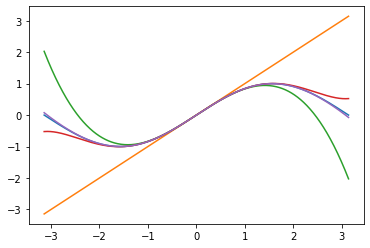

In [ ]:
f = sin(x)
plot(f, (x, -np.pi, np.pi))
for n in range(1, 8, 2):
    g = taylorSeries(f, x, n)
    plot(g, (x, -np.pi, np.pi))

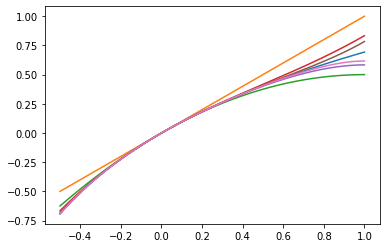

In [ ]:
f = ln(1 + x)
plot(f, (x, -0.5, 1))
for n in range(1, 7):
    g = taylorSeries(f, x, n)
    plot(g, (x, -0.5, 1))

In [ ]:
f = (x - 1) ** 2 * (3 * x - 2) * (x + 2)
show(f)

<IPython.core.display.Math object>

In [ ]:
g = taylorSeries(f, x, 4)
show(g)

<IPython.core.display.Math object>

In [ ]:
g = taylorSeries(f, x, 4, 1)
show(g)

<IPython.core.display.Math object>

In [ ]:
def rational(n, m):
  if n == 0:
    return ['q', 0, 1]
  if m < 0:
    n, m = -n, -m
  d = gcd(abs(n), m)
  return ['q', n // d, m // d]

def Q(n, m):
  return Expression(rational(n, m))
  
def gcd(n, m):
  while m:
    n, m = m, n % m
  return n

In [ ]:
p = Q(2, 4) + Q(2, 3)
show(p)
evalf(p), p.T

<IPython.core.display.Math object>

(1.1666666666666665, ['+', ['q', 1, 2], ['q', 2, 3]])

In [ ]:
def normalize(x):
  if isinstance(x, (int, str)): return x 
  op, arg = x[0], x[1:]
  A = [normalize(a) for a in arg] 
  if op in '+S': # сборка сумм
    R = []
    for a in A:
      R += a[1:] if isinstance(a, list) and a[0] in '+S' else [a]
    return Sum(*R)
  if op in '*P': # сборка произведений
    R = []
    for a in A:
      R += a[1:] if isinstance(a, list) and a[0] in '*P' else [a]
    return Product(*R)
  if op == '~': # унарный минус
    return normalize(Product(-1, A[0]))
  if op == '-': # бинарный минус
    return normalize(Sum(A[0], Product(-1, A[1])))
  if op == '/': # деление
    return normalize(Product(A[0], power(A[1], -1)))
  if op == '^': # нормализация степеней
    if isinstance(A[0], list) and A[0][0] == 'P':
      B = [power(a, A[1]) for a in A[0][1:]]
      return normalize(Product(*B))
    if isinstance(A[0], list) and A[0][0] == '^':
      d = Product(A[0][2], A[1])
      return normalize(power(A[0][1], d))
  return x


In [ ]:
f = x / ((x * x ** 2) ** 3)
print(f.T)
F = Expression(normalize(f.T))
print(F.T)
show(F)

['/', 'x', ['^', ['*', 'x', ['^', 'x', 2]], 3]]
['P', 'x', ['^', 'x', ['P', 3, -1]], ['^', 'x', ['P', ['P', 2, 3], -1]]]


<IPython.core.display.Math object>

In [ ]:
f = (x - 1) / x
print(f.T)
F = Expression(normalize(f.T))
print(F.T)
show(F)

['/', ['-', 'x', 1], 'x']
['P', ['S', 'x', ['P', -1, 1]], ['^', 'x', -1]]


<IPython.core.display.Math object>

In [ ]:
f = (x + x) + (x + 1)
print(f.T)
F = Expression(normalize(f.T))
F.T

['+', ['+', 'x', 'x'], ['+', 'x', 1]]


['S', 'x', 'x', 'x', 1]

In [ ]:
def sortx(x):
  if isinstance(x, list):
    op, arg = x[0], x[1:]
    A = [sortx(a) for a in arg]
    if op in 'SP':
      A.sort(key = lambda a: str(a))
    return [op, *A]
  return x

In [ ]:
f = x * y + 2 + y * x 
show(f)
print(f.T)
F = Expression(normalize(f.T))
print(F.T)
F2 = Expression(sortx(F.T))
print(F2.T)
show(F2)

<IPython.core.display.Math object>

['+', ['+', ['*', 'x', 'y'], 2], ['*', 'y', 'x']]
['S', ['P', 'x', 'y'], 2, ['P', 'y', 'x']]
['S', 2, ['P', 'x', 'y'], ['P', 'x', 'y']]


<IPython.core.display.Math object>

In [ ]:
def simplify(x):
  if isinstance(x, Expression):
    return Expression(simplify(x.T))
  if isinstance(x, str): # символ
    return x
  if isinstance(x, int): # целое, преобразуем в рациональное
    return rational(x, 1)
  if x[0] == 'q': # рациональное
    return x
  x = sortx(normalize(x))
  op, arg = x[0], x[1:]
  A = [simplify(a) for a in arg]
  if op == '^':
    if isinstance(A[1], list) and A[1][0] == 'q' and A[1][2] == 1:
      if isinstance(A[0], list) and A[0][0] == 'q':
        n, m, d = A[0][1], A[0][2], A[1][1]
        if d >= 0:
          return rational(n ** d, m ** d)
        else:
          return rational(m ** (-d), n ** (-d))
  if op == 'P':
    n, m, V = 1, 1, []
    for a in A:
      if isinstance(a, list) and a[0] == 'q':
        n, m = n * a[1], m * a[2]
      else:
        V.append(a)
    q = rational(n, m)
    # здесь можно упростить множители V, не являющиеся рациональными числами
    if q[1] == 0 or V == []: return q
    if q[1] == 1 and q[2] == 1 and len(V) == 1: return V[0]
    A = [q, *V] if q[1] != 1 or q[2] != 1 else [*V]
  if op == 'S':
    n, m, V = 0, 1, []
    for a in A:
      if isinstance(a, list) and a[0] == 'q':
        n, m = n * a[2] + m * a[1], m * a[2]
      else:
        V.append(a)
    q = rational(n, m)
    if len(V) > 1:
      V = collectSameTerms(V)
    if V == []: return q
    if q[1] == 0 and len(V) == 1: return V[0]
    A = [q, *V] if q[1] != 0 else [*V]
  return [op, *A]

def collectSameTerms(A):
  count, X = 1, []
  for k in range(1, len(A)):
    if A[k] == A[k - 1]:
      count += 1
      continue
    X.append(simplify(Product(rational(count, 1), A[k - 1])))
    count = 1
  X.append(simplify(Product(rational(count, 1), A[-1])))
  return X

In [ ]:
f = 2 * x + 1 + y + x * 2 + x * (Q(1, 2) + Q(3, 2)) + y
show(f)
F = simplify(f)
show(F)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
f = (Q(1, 2) + Q(1, 3) - Q(2, 7)) * x
show(f)
F = simplify(f)
show(F)
F.T

<IPython.core.display.Math object>

<IPython.core.display.Math object>

['P', ['q', 23, 42], 'x']

In [ ]:
f = (x * 1 / 2 * 3) ** 2
show(f)
F = simplify(f)
show(F)
F.T

<IPython.core.display.Math object>

<IPython.core.display.Math object>

['P', ['q', 9, 4], ['^', 'x', ['q', 2, 1]]]

In [ ]:
f = simplify(Expression(3) / 2)
show(f)

<IPython.core.display.Math object>

In [ ]:
pi = symbols('pi')
f = sin(x + 2 * pi)
show(f)

<IPython.core.display.Math object>

In [ ]:
f = x ** 3
F = simplify(Diff(f, x, 2))
show(F)
F.T

<IPython.core.display.Math object>

['P', ['q', 6, 1], ['^', 'x', ['q', 1, 1]]]

In [ ]:
for n in range(5):
  show(Diff(x ** 3, x, n))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
for n in range(5):
  show(simplify(Diff(x ** 3, x, n)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Лекция 6. Упрощение выражений

In [ ]:
def Eq(x, y):
  return Expression(['=', fix(x).T, fix(y).T])

def lhs(f):
  if f.T[0] == '=':
    return Expression(f.T[1])
  return f

def rhs(f):
  if f.T[0] == '=':
    return Expression(f.T[2])
  return f

In [ ]:
eq = Eq(x, x ** 2 + 1)
show(eq)
show(rhs(eq))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def contains(f, x):
  if isinstance(f, Expression):
    return contains(f.T, x.T)
  if isinstance(f, str):
    return f == x
  if isinstance(f, list):
    for a in f[1:]:
      if contains(a, x):
        return True
  return False

In [ ]:
eq = Eq(x, x ** 2 + 1)
contains(eq, x), contains(eq, y)

(True, False)

In [ ]:
def subs(f, x, x0):
  if isinstance(f, Expression):
    return Expression(subs(f.T, fix(x).T, fix(x0).T))

  if f == x:
    return x0

  if isinstance(f, list):
    A = [subs(a, x, x0) for a in f[1:]]
    return [f[0], *A]
  return f

In [ ]:
show(eq)
eq2 = subs(eq, x, Q(1, 2))
show(eq2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def Set(*X):
  A = [x.T for x in X]
  return Expression(['set', *A])

In [ ]:
S = Set(Z(1), x, x**2, x**3)
show(S)
for i in range(len(S)):
    show(S[i])
show(Set())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def solveLinear(eq, x):
  f = lhs(eq) - rhs(eq)
  df = diff(f, x)
  k = simplify(df)
  if contains(k, x):
    raise ValueError('Equation is not linear')
  b = simplify(subs(f, x, Z(0)))
  if k.T != ['q', 0, 1]:
    return Set(simplify(-b / k))
  return Set()

In [ ]:
eq = Eq(Z(2) * x / 5 - 1, Z(3) + x / 2)
show(eq)
sol = solveLinear(eq, x)
show(sol)
if len(sol) > 0:
    x0 = sol[0]
    show(Eq(x, x0))
    show(simplify(subs(eq, x, x0)))
else:
    print('no solution')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def solveUnique(eq, x):
  F = simplify(lhs(eq) - rhs(eq))
  x0 = solveUnique_(F.T, 0, x.T)
  if x0 == None:
    return Set()
  return Set(Expression(x0))

In [ ]:
def solveUnique_(L, R, x):
  if L == x:
    return R
  return None

In [ ]:
show(solveUnique(Eq(x, 0), x))

<IPython.core.display.Math object>

# Лекция 7. Интегрирование

In [ ]:
def integral(f, x):
  return ['integral', f, x]

def Integrate(f, x):
  F1 = Expression(integral(f.T, x.T))
  F2 = integrate(f, x)
  s = f'{latex(F1)} = {latex(F2)}'
  display(Math(s))

In [ ]:
def integrate(f, x):
  if isinstance(f, Expression):
    return Expression(integrate(f.T, x.T))
  # константа
  if not contains(f, x):
    return mul(f, x)
  # табличные интегралы
  if f[0] == 'sin' and f[1] == x:
    return negative(cos_(x))
  if f[0] == 'cos' and f[1] == x:
    return sin_(x)
  if f[0] == 'exp' and f[1] == x:
    return exp_(x)
  # степенные функции
  f = simplify(f)
  if f == x:
    return div(power(x, 2), 2)
  if f[0] == '^' and f[1] == x:
    if f[2] == rational(-1, 1):
      return ln_(x)
    if not contains(f[2], x):
      k = add(f[2], 1)
      return simplify(div(power(x, k), k) )
  # сумма функций
  if f[0] == 'S':
    A = [integrate(a, x) for a in f[1:]]
    return Sum(*A)
  # произведение на число
  if f[0] == 'P':
    K, X = [], []
    for a in f[1:]:
      if contains(a, x):
        X.append(a)
      else:
        K.append(a)
    if K != []:
      K.append(integrate(Product(*X), x))
      return simplify(Product(*K))
  # замена (внесение под дифференциал)
  if f[0] == 'P' and len(f[1:]) == 2 and (f[1] == x or f[2] == x):
    i = 2 if f[1] == x else 1 
    t = x + '_'
    g = subs(f[i], power(x, rational(2, 1)), t) 
    if not contains(g, x):
      G = integrate(g, t)
      F = subs(G, t, power(x, rational(2, 1)))
      return simplify(div(F, 2)) 
  # линейная замена
  I = linearSubsInt(f, x)
  if I != None:
    return I    

  return integral(f, x)


In [ ]:
def linearSubsInt(f, x):
  s = findLinearSubs(f, x)
  if s != None:
    t = x + '_'
    g = subs(f, s, t) 
    if not contains(g, x):
      G = integrate(g, t)
      F = subs(G, t, s)
      return simplify(div(F, s[2][1])) 
def findLinearSubs(f, x):
  if isinstance(f, list):
    if f[0] == 'S' and f[1][0] == 'q':
      if f[2][0] == 'P' and f[2][1][0] == 'q' and f[2][2] == x:
        return f
    for a in f[1:]:
      s = findLinearSubs(a, x)
      if s != None:
        return s
  return None

In [ ]:
f = x ** 2
Integrate(f, x)

<IPython.core.display.Math object>

In [ ]:
Integrate(y / 2, x)
Integrate(x / 2, x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
Integrate(sin(x), x)
Integrate(exp(x), x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
Integrate(x, x)
Integrate(x**-1, x)
Integrate(Z(1)/x, x)
Integrate(x ** 2, x)
Integrate(Z(1) / x ** 2, x)
Integrate(x ** Q(1, 2), x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
Integrate(x ** 2 + x ** 3, x)
Integrate(x ** 2 + x ** 3 + 2 * x, x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
Integrate(2 * x ** 3, x)
Integrate(x * y / 3, x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
Integrate(x * sin(x ** 2), x)
Integrate(x * (x ** 2 + 1), x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
L = Z(2) * x + 3
Integrate(exp(L), x)
Integrate(L * cos(L ** 2), x)
Integrate( cos(L ** 2) * L, x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def integrate2(f, x, a, b):
  F = integrate(f, x)
  return simplify(subs(F, x, b) - subs(F, x, a))

In [ ]:
show(integrate2(x ** 2, x, 1, 2))
show(integrate2(sin(x), x, 0, 1))
show(integrate2(x ** 3, x, 1, 1))
show(integrate2(x ** 2, x, 2, 1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
Integrate(sqrt(x), x)
Integrate(1/sqrt(x),x)
Integrate(sqrt(x**3),x)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>